<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/projects/Test_Analyse_Benzinpreise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skprep

In [65]:
datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/Petrol_20220620.csv'
datloc2 = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/Population_Countries.csv'
datagas = pd.read_csv(datloc, encoding='latin-1')
datapop = pd.read_csv(datloc2, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1806279.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,30490639.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,60041996.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,18920657.0,NaN


In [67]:
datagas.sort_values(by='Yearly Gallons Per Capita', ascending=False)

,#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
15,16,Singapore,1357000,1.40%,3679.5,8.71,2.30,486.87
176,177,Saint Pierre & Miquelon,660,0.00%,1705.1,8.27,2.19,462.13
106,107,Malta,47000,0.05%,1652.2,5.28,1.40,295.04
5,6,Saudi Arabia,3302000,3.40%,1560.2,2.35,0.62,131.34
94,95,Luxembourg,56194,0.06%,1487.2,7.91,2.09,441.82
...,...,...,...,...,...,...,...,...
157,158,Rwanda,6700,0.01%,8.8,5.36,1.42,299.27
161,162,Somalia,5600,0.01%,6.1,3.03,0.80,169.20
159,160,Malawi,6001,0.01%,5.3,5.12,1.35,285.95
129,130,DR Congo,21000,0.02%,4.1,4.43,1.17,247.46


In [ ]:
pd.Data

In [72]:
liste = []

for i in datagas['Country']:
  for ii in datapop['Country Name']:
    if i == ii:
      print(datapop[])

United States
China
India
Japan
Saudi Arabia
Brazil
Canada
Germany
Mexico
France
Indonesia
United Kingdom
Singapore
Thailand
Italy
Spain
Australia
Netherlands
Iraq
United Arab Emirates
South Africa
Argentina
Malaysia
Belgium
Pakistan
Poland
Vietnam
Nigeria
Philippines
Colombia
Algeria
Chile
Kuwait
Ukraine
Morocco
Peru
Ecuador
Kazakhstan
Greece
Austria
Sweden
Romania
Cuba
Hungary
Lebanon
Portugal
Turkmenistan
Switzerland
Denmark
Israel
Ireland
Libya
New Zealand
Finland
Panama
Norway
Oman
Qatar
Bangladesh
Myanmar
Kenya
Sudan
Angola
Sri Lanka
Tunisia
Jordan
Dominican Republic
Bulgaria
Belarus
Puerto Rico
Azerbaijan
Guatemala
Bolivia
Ghana
Ethiopia
Serbia
Tanzania
Croatia
Bahrain
Lithuania
Honduras
Trinidad and Tobago
Luxembourg
Costa Rica
Jamaica
Uruguay
El Salvador
Slovenia
Cyprus
Paraguay
Uzbekistan
Senegal
Cambodia
Malta
Nepal
Mozambique
Cameroon
Latvia
Papua New Guinea
Nicaragua
Benin
Afghanistan
Bosnia and Herzegovina
Georgia
Uganda
Estonia
Mauritius
Albania
Namibia
Zimbabwe
Burkina 

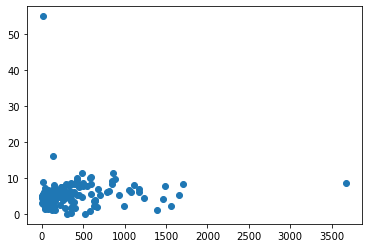

In [43]:
plt.scatter(dataset['Yearly Gallons Per Capita'], dataset['Price Per Gallon (USD)'])
plt.show()